# 911 Calls Capstone Project

In [52]:
# This exercise covers a number of different aspects of data analysis in Python.
# It uses the 911 Call Data dataset from Kaggle and explores a variety of different
# questions and functions

In [53]:
import numpy as np
import pandas as pd

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
df = pd.read_csv('911.csv')
# Importing the dataset as a Pandas DataFrame

In [56]:
df.info()
# Exploring range and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [57]:
df.head()
# Viewing the contents of the DataFrame

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

In [58]:
# Find the top 5 zipcodes for 911 Calls
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [59]:
# Find the top 5 townships for 911 calls
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [60]:
# How many unique call titles are there?
df['title'].nunique()

110

## Creating new features

In [61]:
# In the titles column there are "Reasons/Departments" specified before
# the title code. These are EMS, Fire, and Traffic. 
# Create a new column called "Reason" that contains this string value.

In [62]:
df.head(1)
# Reminder of DataFrame contents

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1


In [63]:
reasons = df['title'].apply(lambda x: x.split(':')[0])
df['Reasons'] = reasons

In [64]:
df.head()
# Check to see that new column has been created correctly

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [65]:
# What is the most common reason for a 911 call?
df['Reasons'].value_counts().head(1)

EMS    48877
Name: Reasons, dtype: int64

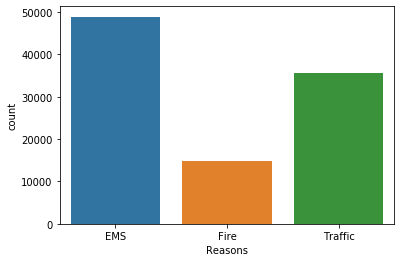

In [66]:
# Create a countplot of the calls categorised by reason
sns.countplot(x=df['Reasons'])

In [67]:
# Convert the time column from a string to DateTime objects
type(df['timeStamp'][0])

str

In [68]:
df['timeStamp'] = df['timeStamp'].apply(lambda timestamp: pd.to_datetime(timestamp))

In [69]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [70]:
# Use the timeStamp information to create columns for hour, day and month
df['Hour'] = df['timeStamp'].apply(lambda timestamp: timestamp.hour)
df['Month'] = df['timeStamp'].apply(lambda timestamp: timestamp.month)
df['Day'] = df['timeStamp'].apply(lambda timestamp: timestamp.dayofweek)

In [71]:
df.head(1)
# Check this has worked correctly

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3


In [72]:
# Map the integer values for day of week to be a suitable string value
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [73]:
df['Day'] = df['Day'].map(dmap)

In [74]:
df.head()
# Check 

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


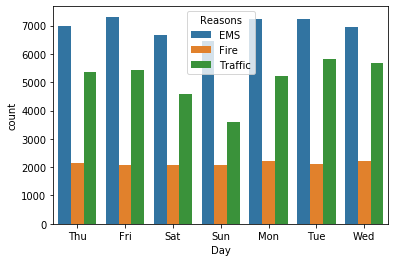

In [75]:
# Create countplot for calls per day of week divided by reason
sns.countplot(df['Day'],hue=df['Reasons'])

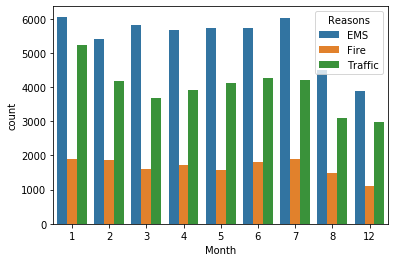

In [76]:
# And same for month
sns.countplot(df['Month'],hue=df['Reasons'])

In [77]:
# Note that the plot is missing data for some months

In [78]:
# Investigate how we can approximate the missing data
byMonth = df.groupby('Month').count()

In [79]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


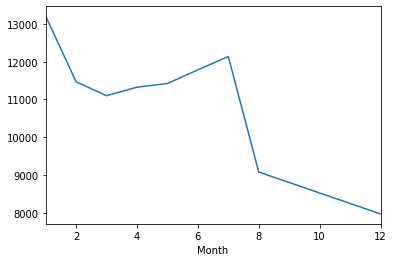

In [80]:
# Create simple plot indicating count of calls per month
byMonth['Day'].plot()

In [81]:
# Create a lmplot on the calls per month
# Can now see the trend for the missing months
byMonth = byMonth.reset_index()

In [82]:
byMonth.head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


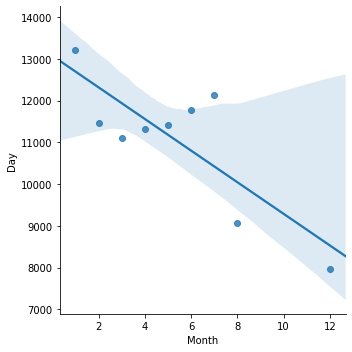

In [83]:
sns.lmplot(x='Month',y='Day',data=byMonth)

In [84]:
# Create column called Date
df['timeStamp'].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [85]:
df['Date'] = df['timeStamp'].apply(lambda timestamp: timestamp.date())

In [86]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Month,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [87]:
# Plot call count per date
dateGroup = df.groupby('Date').count()

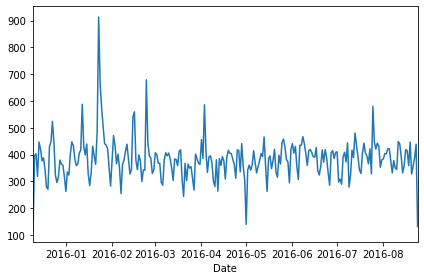

In [88]:
dateGroup['Day'].plot()
plt.tight_layout()

In [89]:
# Create similar plots as above but split by reason

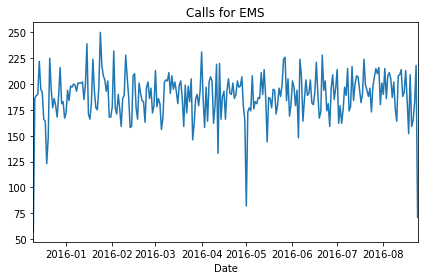

In [90]:
df[df["Reasons"]=='EMS'].groupby('Date').count()['Day'].plot()
    #collect values where Reason = EMS
    #create a data frame of them
    #Group these by date
    #count these values
    #plot
plt.title('Calls for EMS')
plt.tight_layout()

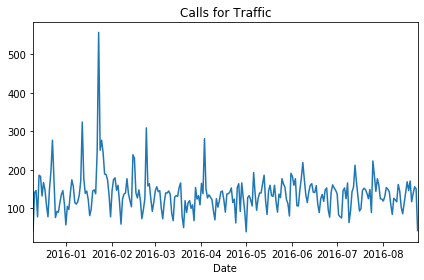

In [91]:
df[df["Reasons"]=='Traffic'].groupby('Date').count()['Day'].plot()
plt.title('Calls for Traffic')
plt.tight_layout()

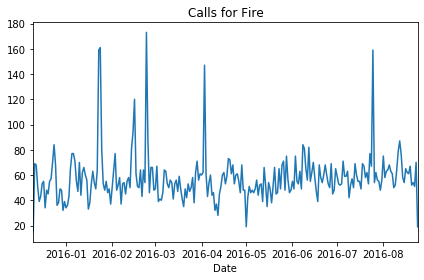

In [92]:
df[df["Reasons"]=='Fire'].groupby('Date').count()['Day'].plot()
plt.title('Calls for Fire')
plt.tight_layout()

# Creating HeatMaps

In [93]:
hourDay = df.groupby(by=['Day','Hour']).count()['Date'].unstack()
    #groups by multilevel index
    #unstacks multilevel and returns a matrix form

In [94]:
hourDay

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


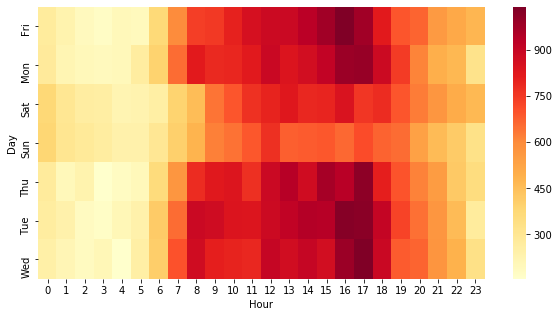

In [95]:
# Create heatmap of calls from the above DataFrame
plt.figure(figsize=(10,5))
sns.heatmap(hourDay, cmap='YlOrRd')

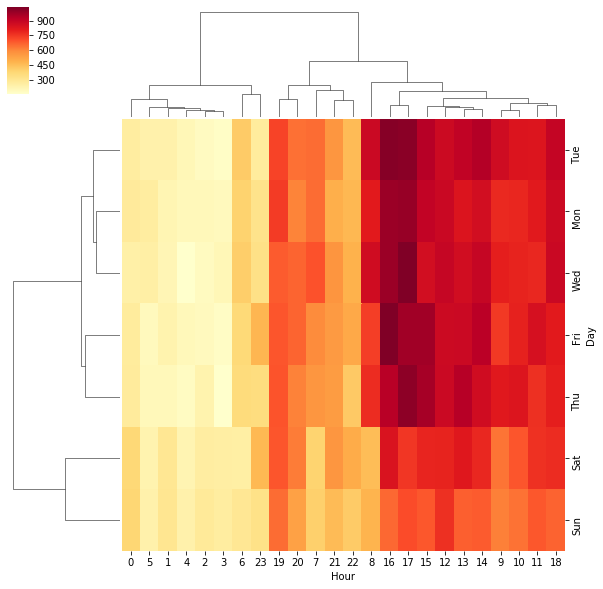

In [96]:
# And now a clustermap
sns.clustermap(hourDay, cmap='YlOrRd')

In [97]:
# Repeat the above heatmap and clustermap for the months

In [98]:
dayMonth = df.groupby(by=['Day','Month']).count()['Date'].unstack()

In [99]:
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


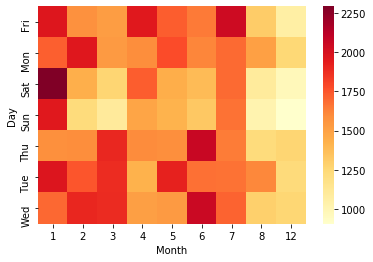

In [100]:
sns.heatmap(dayMonth, cmap='YlOrRd')

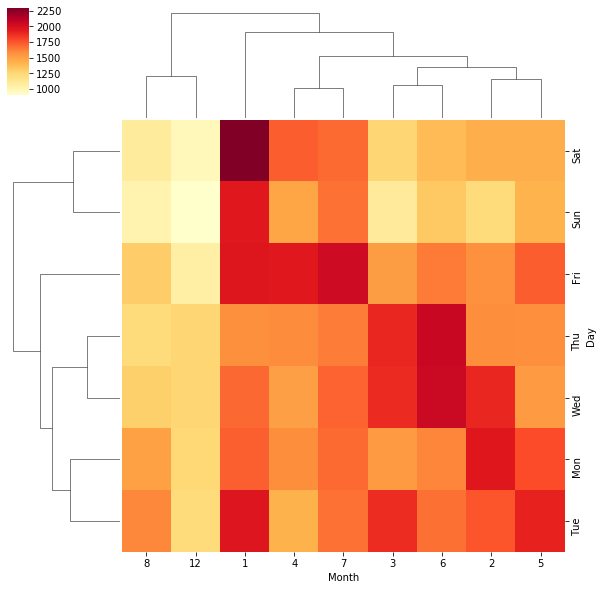

In [101]:
sns.clustermap(dayMonth, cmap='YlOrRd')